In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

import lightgbm as lgb
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
train_data = pd.read_csv("/content/drive/MyDrive/My DataSets/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/My DataSets/test.csv")
sample_solution = pd.read_csv("/content/drive/MyDrive/My DataSets/sample_solution.csv")

In [3]:
print('train data shape: ',train_data.shape)
print('test data shape: ',test_data.shape)
print('sample_solution shape: ',sample_solution.shape)

train data shape:  (75757, 64)
test data shape:  (9705, 63)
sample_solution shape:  (9705, 2)


In [4]:
pd.set_option('display.max_columns',64)

In [5]:
train_data.head(10)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
5,1,State_1,Commercial,Warehouse_Selfstorage,119900.0,1956.0,NaN,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,6.597715,5
6,1,State_1,Commercial,Warehouse_Nonrefrigerated,91367.0,1982.0,56.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,12.817841,6
7,1,State_1,Commercial,Warehouse_Nonrefrigerated,50422.0,1947.0,99.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,22.392014,7
8,1,State_1,Commercial,Office_Uncategorized,122020.0,1929.0,98.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,28.199578,8
9,1,State_1,Commercial,Office_Uncategorized,102612.0,1979.0,83.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50

In [6]:
test_data.head(1)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,64,40,54.482143,66,42,56.935484,77,45,58.45,78,49,60.903226,87,51,63.15,97,53,64.258065,85,53,65.854839,88,54,69.766667,104,48,64.193548,91,43,58.05,69,38,51.887097,66,342,2112,25.24,0.0,0,59.894521,0,0,0,0,29,5,2,0,NaN,NaN,NaN,NaN,75757


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

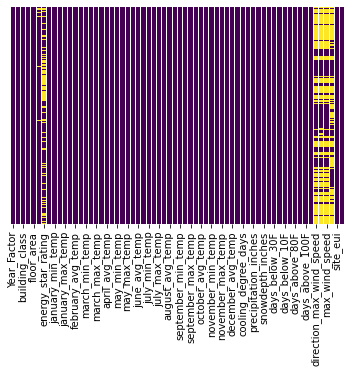

In [8]:
#checking the Missing Data
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#null_columns = train_data.isnull()
nulls = train_data.isna().sum().sort_values(ascending = False)
nulls.head(10)

days_with_fog                45796
direction_peak_wind_speed    41811
max_wind_speed               41082
direction_max_wind_speed     41082
energy_star_rating           26709
year_built                    1837
Year_Factor                      0
november_max_temp                0
cooling_degree_days              0
december_max_temp                0
dtype: int64

In [10]:
nulls = test_data.isna().sum().sort_values(ascending = False)
nulls.head(10)

days_with_fog                9117
max_wind_speed               8575
direction_peak_wind_speed    8575
direction_max_wind_speed     8575
energy_star_rating           2254
year_built                     92
Year_Factor                     0
november_max_temp               0
cooling_degree_days             0
december_max_temp               0
dtype: int64

In [11]:
#Sorting values according to preset ID Column
train_data.sort_values(['id'], ascending=True, inplace=True)
test_data.sort_values(['id'], ascending=True, inplace=True)

In [12]:
(train_data['year_built'] == 0).sum(axis=0)

6

In [13]:
# replacing year built zero values with nan
train_data['year_built'].replace(0,np.nan, inplace = True)
test_data['year_built'].replace(0,np.nan, inplace = True)

In [22]:
features_selected = [
                     'year_built',
                     'floor_area',
                     'facility_type',
                     'energy_star_rating',
                     'ELEVATION',
                     'days_with_fog',
                     'State_Factor',
                     'building_class',
                     'snowdepth_inches',
                     'july_avg_temp',
                     'Year_Factor',
                     'snowdepth_inches',
                     'april_min_temp',
                     'april_avg_temp'
                     ]

In [15]:
#train_data.hist(bins=20, figsize=(20,15))
#plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


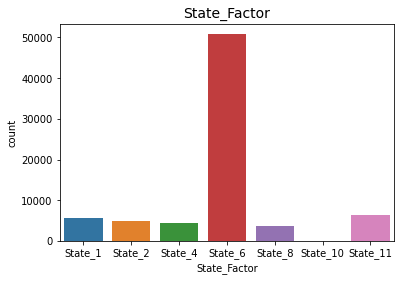

In [16]:
sns.countplot(train_data.State_Factor)
plt.title('State_Factor', fontdict={'size':14});

In [17]:
# Check unique values for each categorical column

#cat_cols = ['State_Factor', 'building_class', 'facility_type']
cat_cols = train_data.select_dtypes('object').columns.tolist()
for col in cat_cols:
  print(col)
  print(train_data[col].unique(), '\n')

State_Factor
['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11'] 

building_class
['Commercial' 'Residential'] 

facility_type
['Grocery_store_or_food_market'
 'Warehouse_Distribution_or_Shipping_center' 'Retail_Enclosed_mall'
 'Education_Other_classroom' 'Warehouse_Nonrefrigerated'
 'Warehouse_Selfstorage' 'Office_Uncategorized' 'Data_Center'
 'Commercial_Other' 'Mixed_Use_Predominantly_Commercial'
 'Office_Medical_non_diagnostic' 'Education_College_or_university'
 'Industrial' 'Laboratory' 'Public_Assembly_Entertainment_culture'
 'Retail_Vehicle_dealership_showroom' 'Retail_Uncategorized'
 'Lodging_Hotel' 'Retail_Strip_shopping_mall' 'Education_Uncategorized'
 'Health_Care_Inpatient' 'Public_Assembly_Drama_theater'
 'Public_Assembly_Social_meeting' 'Religious_worship'
 'Mixed_Use_Commercial_and_Residential' 'Office_Bank_or_other_financial'
 'Parking_Garage' 'Commercial_Unknown'
 'Service_Vehicle_service_repair_shop' 'Service_Drycleaning_or_Laundry'
 'Public_Asse

In [18]:
'''train_data.dropna(subset=['energy_star_rating'], axis = 0, inplace =True)
test_data.dropna(subset=['energy_star_rating','year_built'], axis = 0, inplace =True)

median = train_data["energy_star_rating"].median()
train_data["energy_star_rating"].fillna(median, inplace=True) '''

'train_data.dropna(subset=[\'energy_star_rating\'], axis = 0, inplace =True)\ntest_data.dropna(subset=[\'energy_star_rating\',\'year_built\'], axis = 0, inplace =True)\n\nmedian = train_data["energy_star_rating"].median()\ntrain_data["energy_star_rating"].fillna(median, inplace=True) '

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


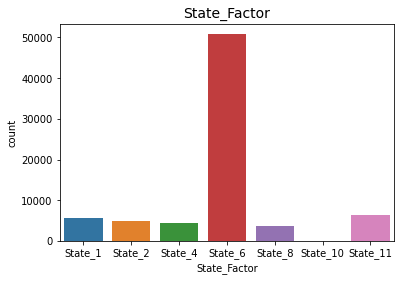

In [19]:
sns.countplot(train_data.State_Factor)
plt.title('State_Factor', fontdict={'size':14});

In [20]:
le = LabelEncoder()
ord = OrdinalEncoder()
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
test_data = test_data[features_selected]
features_selected.append('site_eui')
train_data = train_data[features_selected]

In [24]:
kfold = GroupKFold(n_splits = 6)
x, y = train_data.drop(['site_eui'], axis=1), train_data['site_eui']
group = x['Year_Factor']
y.shape

(75757,)

In [29]:
def preprocessing_data(data):
  

  data = data.copy()
  #####  droping ID Column
  #data=data.drop(["id"], axis=1)


  categ = [
           'State_Factor',
           'building_class', 
           'facility_type'
  ]

  #####  Handling categorical Data
  #data = pd.get_dummies(data=data, prefix_sep="_", columns=categ)
  for cat in categ:
    data[cat] = ord.fit_transform( data[[cat]])

  #####  Handling missing Values
  #data[null_columns] = SimpleImputer(strategy = 'mean').fit_transform(data[null_columns])
  median = data["energy_star_rating"].median()
  data["energy_star_rating"].fillna(median)
  ######
  data = data.fillna(method = 'bfill').fillna(method = 'ffill')

  ##### Scaling the Data
  data = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)
  #pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)

  return data

In [26]:
#function to plot feature importance
 
def ploting_feature_importance(features_importance, top_n_features):
  importance = features_importance.loc[:top_n_features,['feature_name', 'sum_feature_importance']]
  importance = importance.sort_values(by = 'sum_feature_importance').set_index('feature_name')
  importance.plot(kind = 'barh', figsize = (25, 15), legend = None)
  plt.title('Feature Importance', size = 25)
  plt.ylabel('Feature Name', size = 25)
  plt.tight_layout()
  plt.yticks(fontsize = 15)

In [45]:
'''params = {
    'task': 'train', 
    'boosting_type' : 'gbdt', 
    'learning_rate' : 0.1,
    'max_depth' : 25, 
    'objective' : 'regression', 
    'random_state' : 42,
    'metric' : {'rmse'},
    'min_data_per_group' : 500
}'''

params = {
    'task': 'train',
    #'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': { 'rmse'},
    'num_iterations':5000,
    #'max_bin':5395,
    "max_depth":10,
    "num_leaves":1024,
    'learning_rate': 0.05,
    #"min_child_samples": 100,
    #'feature_fraction': 0.9,
    #"bagging_freq":1,
    #'bagging_fraction': 0.9,
    "lambda_l1":10,
    "lambda_l2":10,
    # "scale_pos_weight":30,
    #'min_data_per_group':500,
    'verbose': 1    
}

In [46]:
#Grouping DATA according to Year factor 
features_importance = pd.DataFrame()
for count, (train_index, test_index) in enumerate(kfold.split(x, y, group)):
  X_train, X_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  sub_data = test_data.copy()

  X_train = preprocessing_data(X_train)
  X_test = preprocessing_data(X_test)
  sub_data = preprocessing_data(sub_data) 

  lgb_train = lgb.Dataset(X_train, label = y_train)
  lgb_test = lgb.Dataset(X_test, label = y_test)

  #### training the model
  print(f" starting training fold {count + 1}")
  model = lgb.train(params, lgb_train, num_boost_round = 100000, valid_sets=[lgb_train, lgb_test], early_stopping_rounds = 500, verbose_eval=True)
  print(f" finishing training fold {count + 1}")

  if count == 0:
    features_importance['feature_name'] = model.feature_name()
    features_importance["sum_feature_importance"] = 0
  features_importance[f'feature importance{count+1}'] = model.feature_importance()
  features_importance["sum_feature_importance"] += model.feature_importance()

 starting training fold 1
[1]	training's rmse: 57.6786	valid_1's rmse: 56.0675
Training until validation scores don't improve for 500 rounds.
[2]	training's rmse: 56.7196	valid_1's rmse: 55.0261


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[3]	training's rmse: 55.8281	valid_1's rmse: 54.0625
[4]	training's rmse: 54.9989	valid_1's rmse: 53.1757
[5]	training's rmse: 54.2386	valid_1's rmse: 52.4184
[6]	training's rmse: 53.515	valid_1's rmse: 51.7059
[7]	training's rmse: 52.8395	valid_1's rmse: 51.0203
[8]	training's rmse: 52.2271	valid_1's rmse: 50.4428
[9]	training's rmse: 51.6379	valid_1's rmse: 49.8666
[10]	training's rmse: 51.0838	valid_1's rmse: 49.3875
[11]	training's rmse: 50.571	valid_1's rmse: 48.9985
[12]	training's rmse: 50.097	valid_1's rmse: 48.6597
[13]	training's rmse: 49.648	valid_1's rmse: 48.276
[14]	training's rmse: 49.2299	valid_1's rmse: 47.9166
[15]	training's rmse: 48.8367	valid_1's rmse: 47.5838
[16]	training's rmse: 48.4581	valid_1's rmse: 47.2591
[17]	training's rmse: 48.0985	valid_1's rmse: 46.989
[18]	training's rmse: 47.777	valid_1's rmse: 46.7179
[19]	training's rmse: 47.4562	valid_1's rmse: 46.4964
[20]	training's rmse: 47.1614	valid_1's rmse: 46.2855
[21]	training's rmse: 46.8775	valid_1's rm

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[7]	training's rmse: 53.1767	valid_1's rmse: 50.2401
[8]	training's rmse: 52.5818	valid_1's rmse: 49.5423
[9]	training's rmse: 52.0322	valid_1's rmse: 48.9466
[10]	training's rmse: 51.517	valid_1's rmse: 48.3917
[11]	training's rmse: 51.0267	valid_1's rmse: 47.8862
[12]	training's rmse: 50.5765	valid_1's rmse: 47.4478
[13]	training's rmse: 50.166	valid_1's rmse: 47.0291
[14]	training's rmse: 49.7704	valid_1's rmse: 46.6107
[15]	training's rmse: 49.384	valid_1's rmse: 46.2513
[16]	training's rmse: 49.0252	valid_1's rmse: 45.9531
[17]	training's rmse: 48.6876	valid_1's rmse: 45.6344
[18]	training's rmse: 48.3692	valid_1's rmse: 45.3249
[19]	training's rmse: 48.0516	valid_1's rmse: 45.032
[20]	training's rmse: 47.7926	valid_1's rmse: 44.806
[21]	training's rmse: 47.5048	valid_1's rmse: 44.5164
[22]	training's rmse: 47.2788	valid_1's rmse: 44.3162
[23]	training's rmse: 47.0413	valid_1's rmse: 44.1026
[24]	training's rmse: 46.8221	valid_1's rmse: 43.8866
[25]	training's rmse: 46.6141	valid_

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 57.1402	valid_1's rmse: 57.7746
Training until validation scores don't improve for 500 rounds.
[2]	training's rmse: 56.1752	valid_1's rmse: 56.9464
[3]	training's rmse: 55.2795	valid_1's rmse: 56.1822
[4]	training's rmse: 54.4401	valid_1's rmse: 55.4862
[5]	training's rmse: 53.66	valid_1's rmse: 54.8013
[6]	training's rmse: 52.9412	valid_1's rmse: 54.161
[7]	training's rmse: 52.2495	valid_1's rmse: 53.6397
[8]	training's rmse: 51.6002	valid_1's rmse: 53.1025
[9]	training's rmse: 50.9911	valid_1's rmse: 52.5547
[10]	training's rmse: 50.4259	valid_1's rmse: 52.0983
[11]	training's rmse: 49.9076	valid_1's rmse: 51.6546
[12]	training's rmse: 49.4307	valid_1's rmse: 51.2615
[13]	training's rmse: 48.9748	valid_1's rmse: 50.9029
[14]	training's rmse: 48.5594	valid_1's rmse: 50.5688
[15]	training's rmse: 48.1645	valid_1's rmse: 50.266
[16]	training's rmse: 47.756	valid_1's rmse: 49.9947
[17]	training's rmse: 47.3993	valid_1's rmse: 49.7572
[18]	training's rmse: 47.043	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 56.6589	valid_1's rmse: 60.4933
Training until validation scores don't improve for 500 rounds.
[2]	training's rmse: 55.6179	valid_1's rmse: 60.0278
[3]	training's rmse: 54.6548	valid_1's rmse: 59.598
[4]	training's rmse: 53.759	valid_1's rmse: 59.2124
[5]	training's rmse: 52.9331	valid_1's rmse: 58.8667
[6]	training's rmse: 52.1175	valid_1's rmse: 58.5027
[7]	training's rmse: 51.3605	valid_1's rmse: 58.1836
[8]	training's rmse: 50.6931	valid_1's rmse: 57.9408
[9]	training's rmse: 50.041	valid_1's rmse: 57.6745
[10]	training's rmse: 49.4447	valid_1's rmse: 57.4548
[11]	training's rmse: 48.8754	valid_1's rmse: 57.2067
[12]	training's rmse: 48.3658	valid_1's rmse: 57.0148
[13]	training's rmse: 47.8707	valid_1's rmse: 56.8244
[14]	training's rmse: 47.4025	valid_1's rmse: 56.6516
[15]	training's rmse: 46.9417	valid_1's rmse: 56.507
[16]	training's rmse: 46.5113	valid_1's rmse: 56.3755
[17]	training's rmse: 46.1163	valid_1's rmse: 56.2783
[18]	training's rmse: 45.7652	va

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 57.75	valid_1's rmse: 53.152
Training until validation scores don't improve for 500 rounds.
[2]	training's rmse: 56.7095	valid_1's rmse: 52.7985
[3]	training's rmse: 55.7019	valid_1's rmse: 52.475
[4]	training's rmse: 54.8012	valid_1's rmse: 52.1987
[5]	training's rmse: 53.9634	valid_1's rmse: 51.9222
[6]	training's rmse: 53.1875	valid_1's rmse: 51.6808
[7]	training's rmse: 52.4625	valid_1's rmse: 51.4746
[8]	training's rmse: 51.7323	valid_1's rmse: 51.2649
[9]	training's rmse: 51.0843	valid_1's rmse: 51.0826
[10]	training's rmse: 50.4831	valid_1's rmse: 50.9477
[11]	training's rmse: 49.8982	valid_1's rmse: 50.7976
[12]	training's rmse: 49.39	valid_1's rmse: 50.6362
[13]	training's rmse: 48.9016	valid_1's rmse: 50.5279
[14]	training's rmse: 48.4184	valid_1's rmse: 50.4109
[15]	training's rmse: 47.9991	valid_1's rmse: 50.2324
[16]	training's rmse: 47.579	valid_1's rmse: 50.16
[17]	training's rmse: 47.1925	valid_1's rmse: 50.1079
[18]	training's rmse: 46.8056	valid_1

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 56.3625	valid_1's rmse: 81.3584
Training until validation scores don't improve for 500 rounds.
[2]	training's rmse: 55.3929	valid_1's rmse: 80.3562
[3]	training's rmse: 54.4988	valid_1's rmse: 79.433
[4]	training's rmse: 53.6543	valid_1's rmse: 78.7686
[5]	training's rmse: 52.8478	valid_1's rmse: 77.9601
[6]	training's rmse: 52.1217	valid_1's rmse: 77.4419
[7]	training's rmse: 51.4459	valid_1's rmse: 76.9403
[8]	training's rmse: 50.8183	valid_1's rmse: 76.4522
[9]	training's rmse: 50.2036	valid_1's rmse: 76.0236
[10]	training's rmse: 49.6576	valid_1's rmse: 75.67
[11]	training's rmse: 49.1242	valid_1's rmse: 75.2387
[12]	training's rmse: 48.6289	valid_1's rmse: 74.8453
[13]	training's rmse: 48.1744	valid_1's rmse: 74.6073
[14]	training's rmse: 47.7478	valid_1's rmse: 74.2176
[15]	training's rmse: 47.3419	valid_1's rmse: 73.8451
[16]	training's rmse: 46.9402	valid_1's rmse: 73.5884
[17]	training's rmse: 46.5662	valid_1's rmse: 73.4003
[18]	training's rmse: 46.2262	v

In [39]:
print('train data shape: ',train_data.shape)
print('test data shape: ',test_data.shape)
print('x train data shape: ',X_train.shape)

train data shape:  (75757, 15)
test data shape:  (9705, 14)
x train data shape:  (73640, 14)


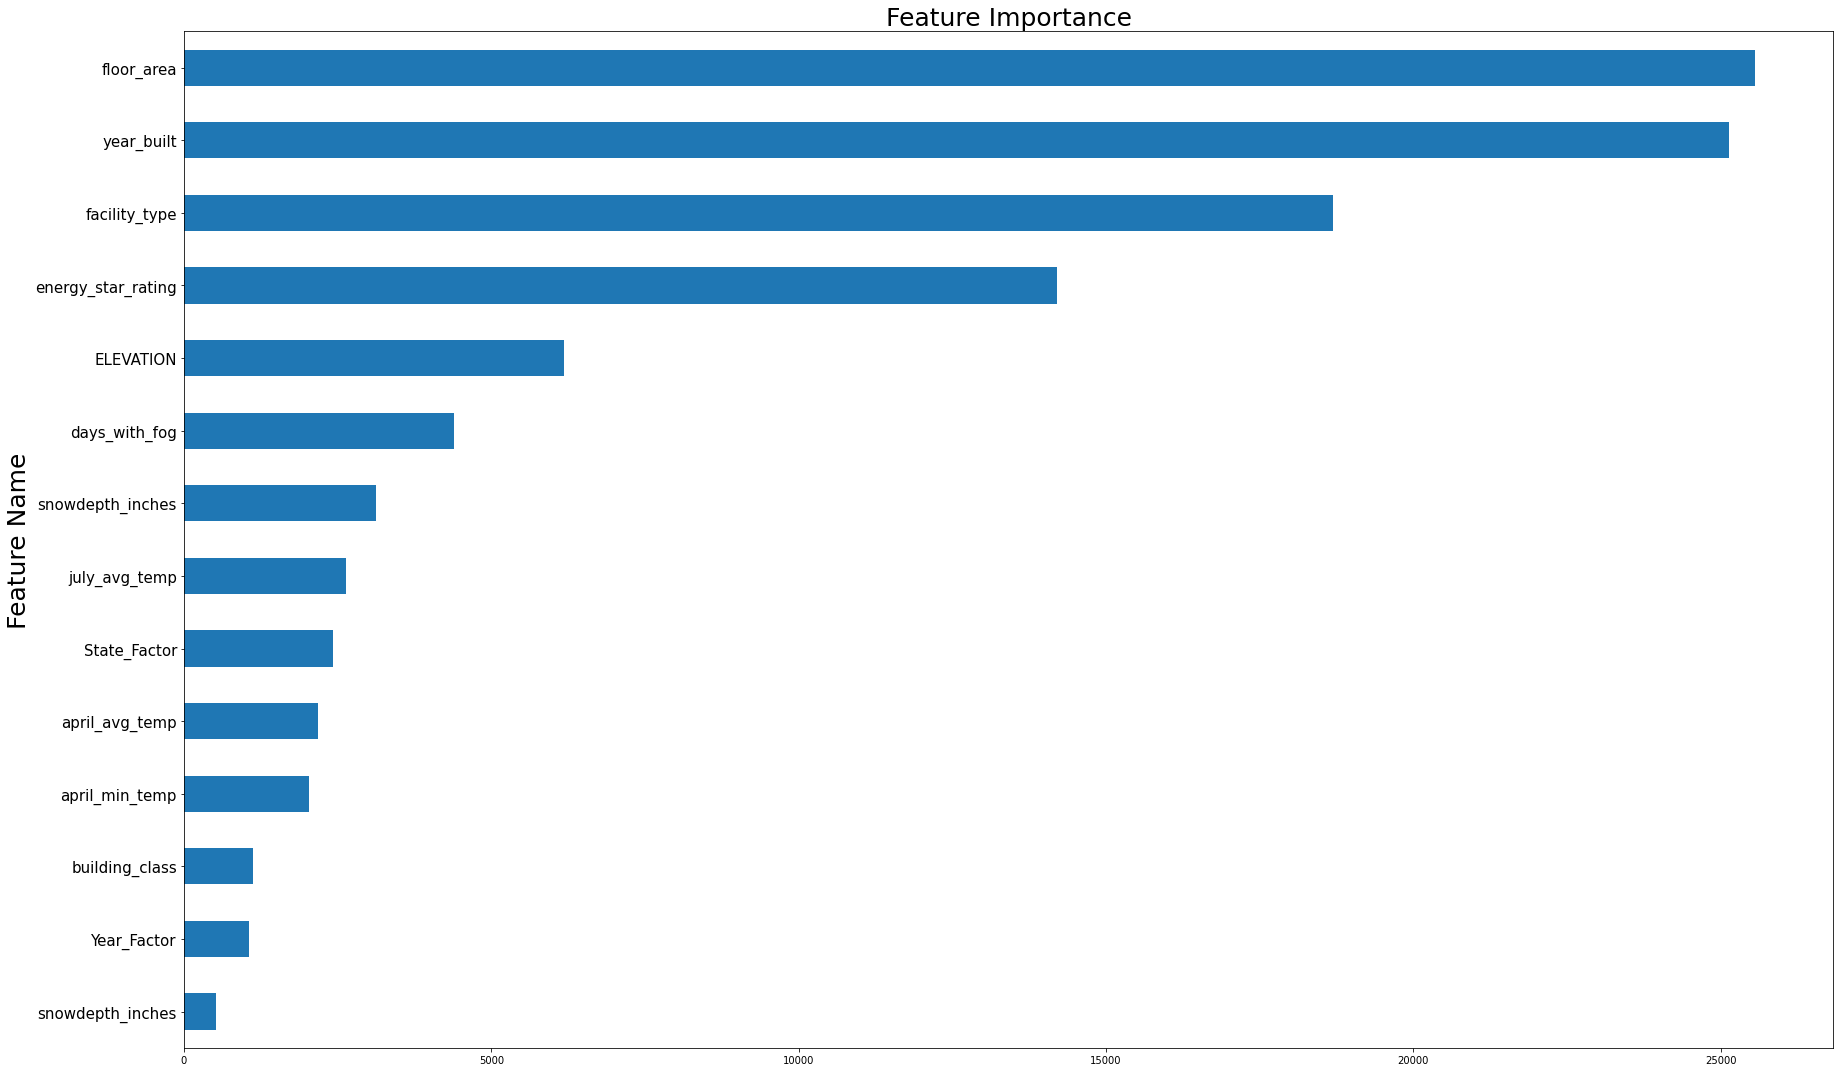

In [40]:
ploting_feature_importance(features_importance, top_n_features = len(train_data))

In [47]:
sample_solution['site_eui'] += model.predict(sub_data, num_iteration = model.best_iteration)

In [48]:
sample_solution["site_eui"] = sample_solution["site_eui"]/kfold.get_n_splits()

In [49]:
sample_solution.shape

(9705, 2)

In [50]:
sample_solution.to_csv("submission3.csv", index=False)